In [58]:
import pydotplus as pydotplus
from io import StringIO
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
# !rm tripadvisor_review.csv
# !rm hcvdat0.csv
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv

    sexo -> 0 masculino    1  femenino
    categoria -> 0 donante       1 sospechoso donante       2 hepatitis

In [59]:
le = preprocessing.LabelEncoder()

data = pd.read_csv("hcvdat0 (1).csv")
# data.head()
# data

In [60]:
# chau a los datos nulos
data = data.dropna()
data

,id,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [61]:
feature_names = list(data.columns)
# data
# del data['id']
feature_names.remove('Category')
feature_names.remove('id')
x = data[feature_names]

# Target
y = data.Category
le.fit(data['Category'])
target_values=["donante","hepatitis","fibrosis","cirrosis"]
# target_values=le.classes_

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy')
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

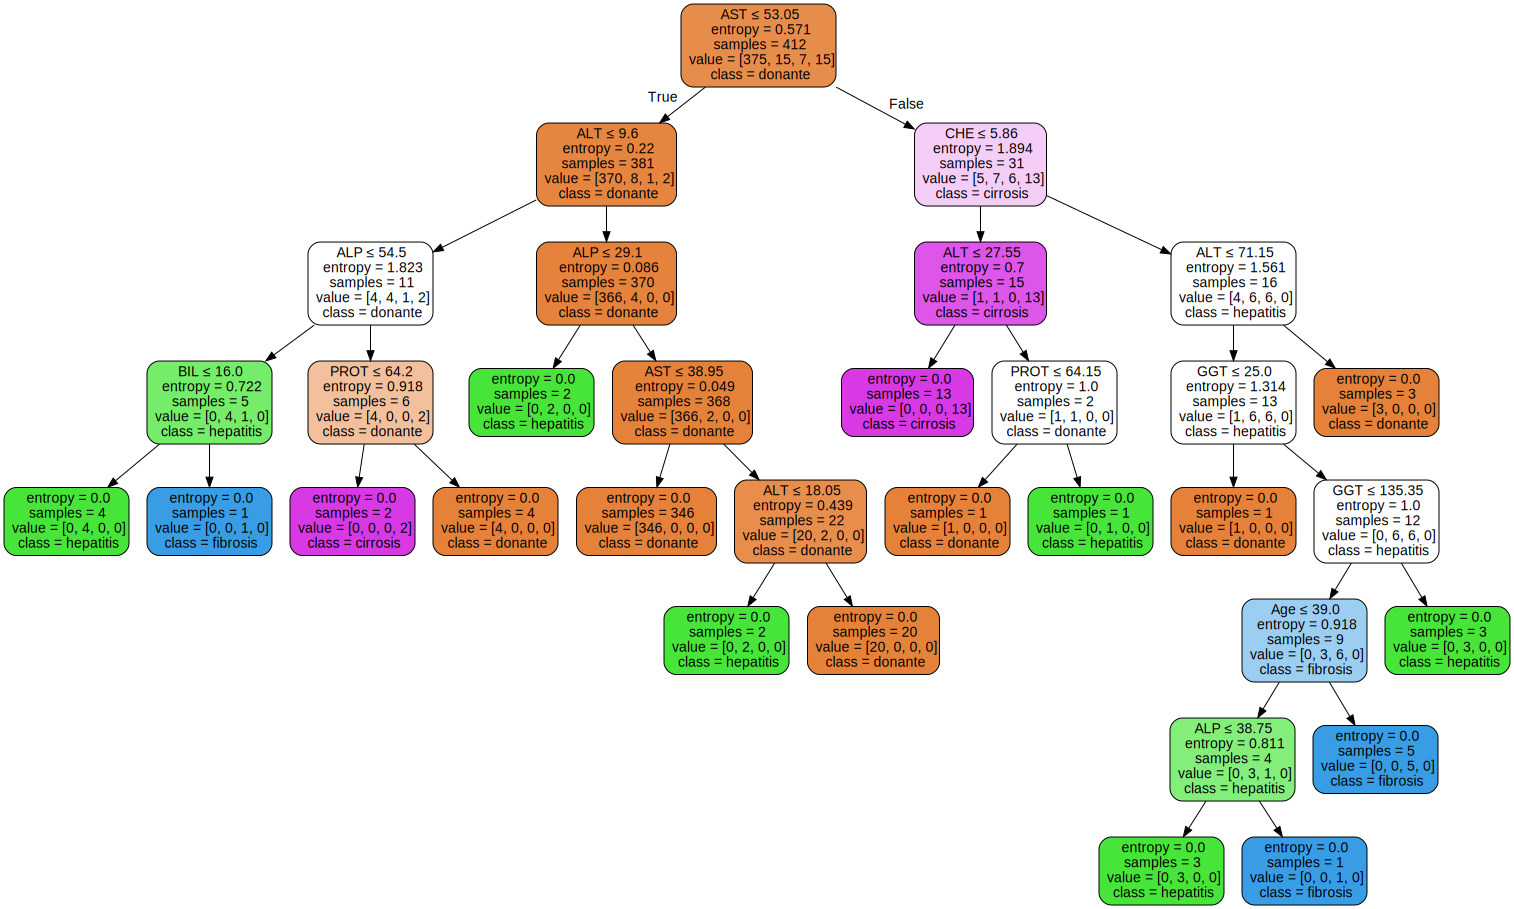

In [63]:
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [64]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file=dot_data,
                                feature_names=feature_names,
                                class_names=target_values,
                                filled=True, rounded=True,
                                special_characters=True)
# Con el string del dot lo paso a un gráfico
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Genero png y lo descargo
graph.write_png('arbol sin podar.png')

True

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

Accuracy: 0.9265536723163842
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       158
           1       0.30      0.60      0.40         5
           2       0.50      0.60      0.55         5
           3       1.00      0.44      0.62         9

    accuracy                           0.93       177
   macro avg       0.70      0.65      0.63       177
weighted avg       0.95      0.93      0.93       177



In [66]:
#whighter algo para ponderar las clases de fibrosis
#class weight

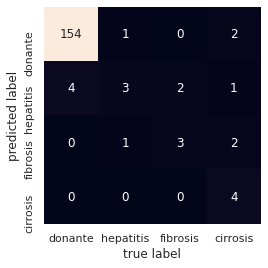

In [67]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

aca probamos podando el arbol y pesando de otra forma

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file=dot_data,
                                feature_names=feature_names,
                                class_names=target_values,
                                filled=True, rounded=True,
                                special_characters=True)
# Con el string del dot lo paso a un gráfico
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Genero png y lo descargo
graph.write_png('arbol podado.png')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

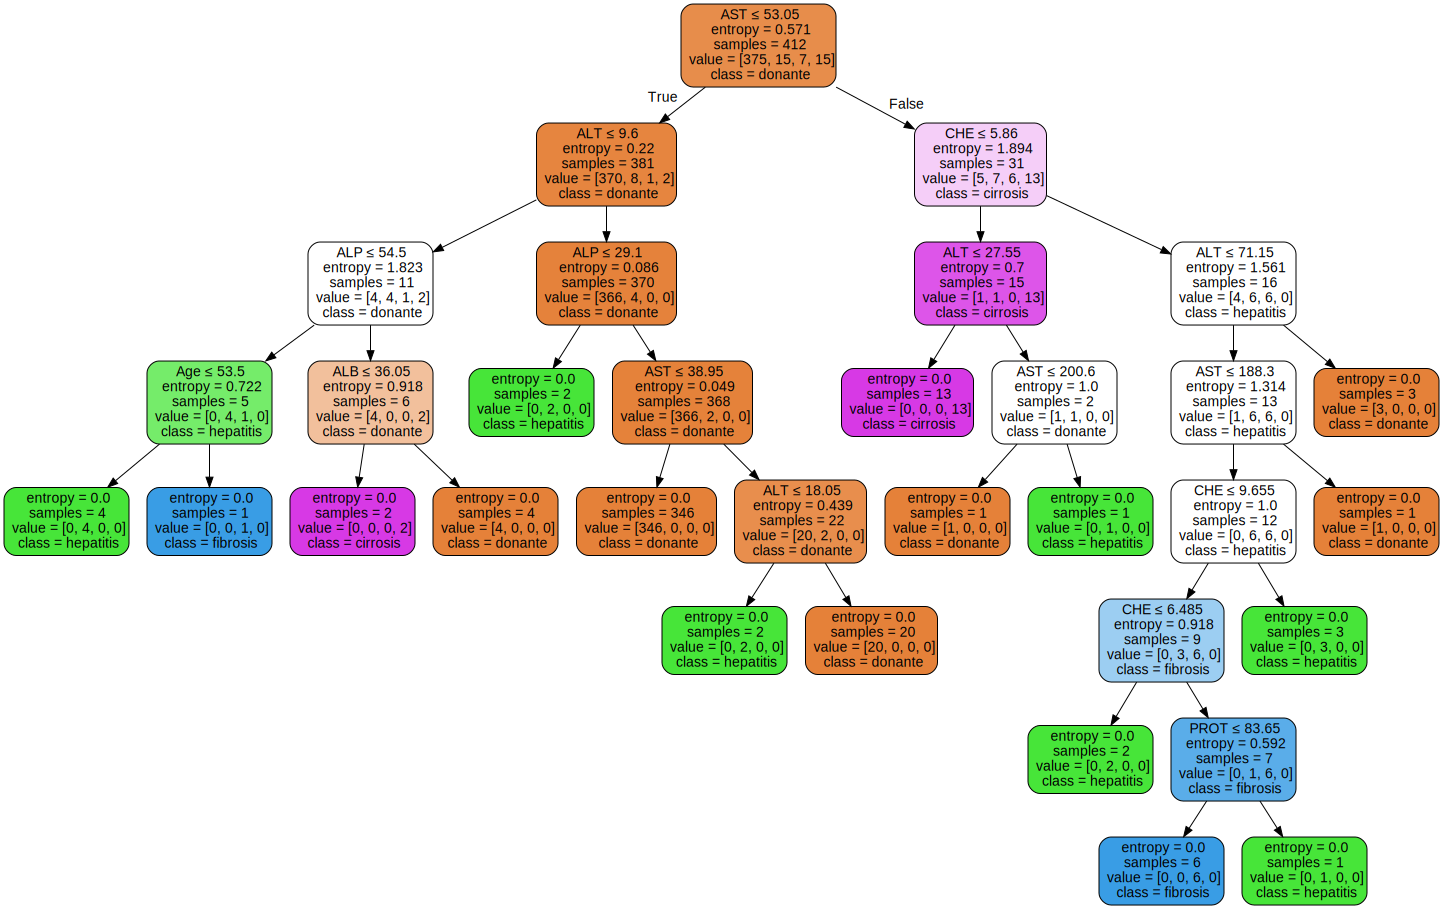

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy', class_weight={0:0.5})
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [78]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file=dot_data,
                                feature_names=feature_names,
                                class_names=target_values,
                                filled=True, rounded=True,
                                special_characters=True)
# Con el string del dot lo paso a un gráfico
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Genero png y lo descargo
graph.write_png('arbol weighteado.png')

True

Accuracy: 0.9096045197740112
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.20      0.40      0.27         5
           2       0.00      0.00      0.00         5
           3       0.83      0.56      0.67         9

    accuracy                           0.91       177
   macro avg       0.50      0.48      0.48       177
weighted avg       0.91      0.91      0.91       177



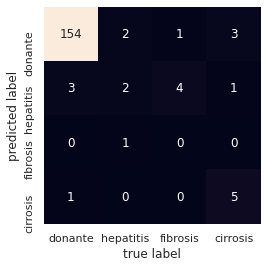

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');